In [110]:
%matplotlib inline

# Data Management
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression   #This is how we use LR
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [61]:
df = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                       sep = ';')

In [62]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
df.isna().sum()
import statsmodels.formula.api as sm
#model1 = sm.ols(formula="starts ~ issued + tobinsq + investment", data=df).fit()
#print(result.params) #Gives just the coefficents
#print(model1.summary())
#plt.hist(model1.resid_pearson)

In [66]:
# Counts the unique values
#df.groupby(by = 'quality').count()

#" This gives us the number of elements per quality"
df.groupby(by = 'quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

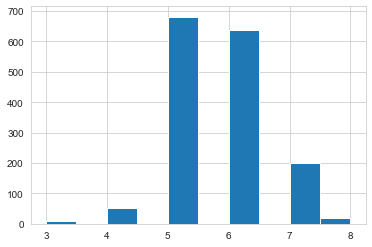

In [67]:
df['quality'].hist()

Text(0, 0.5, 'Density')

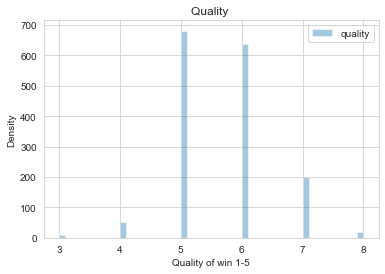

In [68]:
dff = df['quality']
sns.distplot(df['quality'],bins = 50, hist = True, kde = False, label='quality')
sns.set_style('whitegrid')

# Plot formatting
plt.legend()
plt.title('Quality ')
plt.xlabel('Quality of win 1-5')
plt.ylabel('Density')

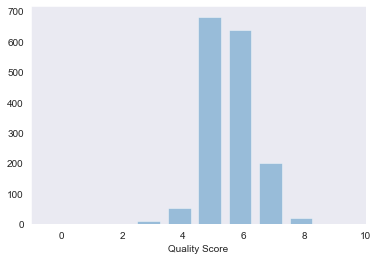

In [78]:
#sns.set_style('whitegrid')
sns.set_style("dark")
sns.distplot(df['quality'], hist = True, bins = 10, axlabel = 'Quality Score',
           kde = False, hist_kws = {'width' : .75, 'range' : (0,10), 'align' : 'left'});


# the rest of gunnars code thast I couldnt get to work
# , 'range' : (0,10), 'align : mid'})

#;semi colin gets rid of warning before the plot

In [ ]:
df.plot(kind = 'box', subplots = True, layout = (2,6), figsize = (12,8));

In [ ]:
df.hist(figsize = (12,12));

In [ ]:
sns.pairplot(df, hue="quality");

In [80]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


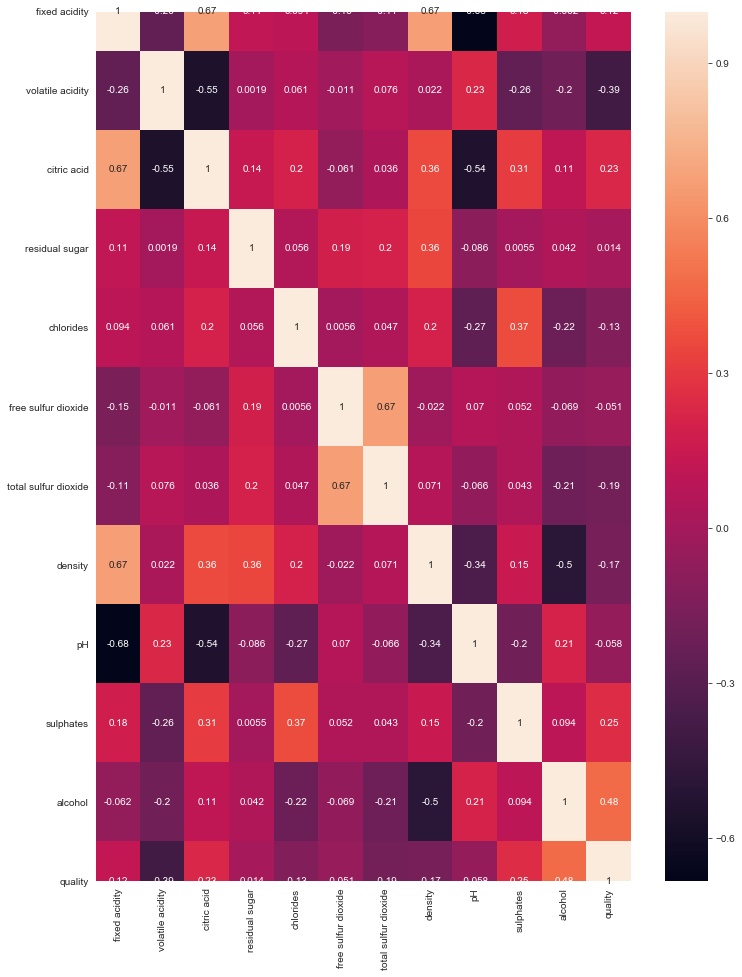

In [92]:

plt.figure(figsize=(12,16))     # Changes the figure size
sns.heatmap(df.corr(), annot = True);

# We can see fixed activity and citrus acid have high correlation so we may qant to remove them
# Ph level & fixed acidicy show collinearity

#, annot_kws={"size": 22}

In [79]:
############## 3/26 lecture ####################

In [93]:
### Clean-up the data

In [94]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [106]:
Y = df['quality']
X = df.iloc[:,0:11]
X.head()
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

#### Exercise 5: Use SML Classification Models
Normalize the observed data. Be sure to use the normalization strategy best suited for the observations about the data.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [107]:
X = preprocessing.robust_scale(X)

In [111]:
#model_selection.train()
Xt, Xv, Yt, Yv = model_selection.train_test_split(X, Y, test_size=0.2, random_state=10)


In [112]:
# K-fold is an object that holds the information about the splits
# In application, we would want to do multiple different random states

kfold = model_selection.KFold(n_splits=10, random_state=10)

In [130]:
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10)
}
results

{'LogisticRegression': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'LinearDiscriminantAnalysis': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'KNeighborsClassifier': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'DecisionTreeClassifier': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'GaussianNB': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'SVC': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [131]:
# Solver - you can change the model of ur data. to a different linear model

alg = LogisticRegression(solver='lbfgs', multi_class="auto")


In [132]:
# Execute the cross-validation strategy
results['LogisticRegression'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                scoring="accuracy", error_score=np.nan)

# Take a look at the scores for each of the 10-fold runs.

# Not good but not bad results. around .5 and .6
results['LogisticRegression']

C:\Users\Joshu\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

array([0.5625    , 0.578125  , 0.6015625 , 0.6328125 , 0.5546875 ,
       0.65625   , 0.65625   , 0.625     , 0.6171875 , 0.59055118])

In [133]:
# Create the LinearDiscriminantAnalysis object with defaults.
alg = LinearDiscriminantAnalysis()

# Execute the cross-validation strategy
results['LinearDiscriminantAnalysis'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                        scoring="accuracy", error_score=np.nan)

# Take a look at the scores for each of the 10-fold runs.
results['LinearDiscriminantAnalysis']

array([0.5390625 , 0.546875  , 0.5625    , 0.6328125 , 0.5546875 ,
       0.625     , 0.640625  , 0.609375  , 0.625     , 0.61417323])

#### Linear Discriminant Analysis (LDA)

In [134]:
Linear Discriminant Analysis (LDA)

SyntaxError: invalid syntax (<ipython-input-134-774bca10922d>, line 1)

In [135]:
# Execute the cross-validation strategy
results['LogisticRegression'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                scoring="accuracy", error_score=np.nan)

# Take a look at the scores for each of the 10-fold runs.
results['LogisticRegression']

array([0.5390625 , 0.546875  , 0.5625    , 0.6328125 , 0.5546875 ,
       0.625     , 0.640625  , 0.609375  , 0.625     , 0.61417323])

#### K-Nearest Neighbors (KNN)

In [140]:
# Create the KNeighborsClassifier object with defaults.
alg = KNeighborsClassifier()

# Execute the cross-validation strategy
results['KNeighborsClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['KNeighborsClassifier']

array([0.5703125 , 0.5625    , 0.59375   , 0.625     , 0.59375   ,
       0.5859375 , 0.609375  , 0.5234375 , 0.5234375 , 0.61417323])

#### Gaussian Naive Bayes (NB)

In [141]:
# Create the GaussianNB object with defaults.
alg = GaussianNB()

# Execute the cross-validation strategy
# Take a look at the scores for each of the 10-fold runs.
results['GaussianNB'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
results['GaussianNB']

array([0.4609375 , 0.5       , 0.5546875 , 0.6015625 , 0.515625  ,
       0.546875  , 0.5859375 , 0.5       , 0.5625    , 0.54330709])

In [142]:
alg = RandomForestClassifier()

results['RandomForestClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)

results['RandomForestClassifier']


C:\Users\Joshu\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Joshu\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: Future

array([0.6796875 , 0.671875  , 0.6328125 , 0.7109375 , 0.640625  ,
       0.65625   , 0.7109375 , 0.6171875 , 0.6640625 , 0.68503937])

#### Support Vector Machines (SVM)

In [144]:
# Create the SVC object with defaults.
alg = SVC(gamma='auto')

# Execute the cross-validation strategy
results['SVC'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['SVC']

array([0.59375   , 0.640625  , 0.59375   , 0.65625   , 0.6015625 ,
       0.625     , 0.6171875 , 0.5859375 , 0.640625  , 0.63779528])

#### Classification and Regression Trees (Decision Trees)

In [146]:
# This model doesn't care about if colinearity is present

# Create the DecisionTreeClassifier object with defaults.
alg = DecisionTreeClassifier()

# Execute the cross-validation strategy
results['DecisionTreeClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['DecisionTreeClassifier']

array([0.6015625 , 0.59375   , 0.5703125 , 0.65625   , 0.6640625 ,
       0.6328125 , 0.578125  , 0.5859375 , 0.625     , 0.62204724])

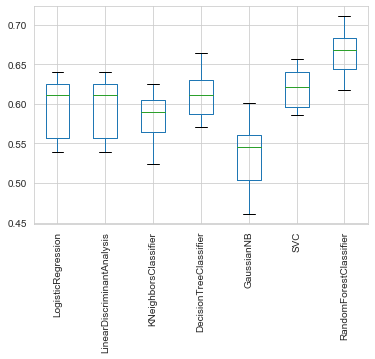

In [150]:
sns.set_style("whitegrid")
pd.DataFrame(results).plot(kind = 'box', rot = 90);

In [ ]:
# Random forest was the best performing model

In [ ]:
## Now create a new model that will use all of our training data

In [151]:
alg.fit(Xt, Yt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [152]:
## Now we are validating with the testing data

predictions = alg.predict(Xv)

In [153]:
print(predictions)

[6 5 5 6 6 7 4 6 3 5 7 3 6 5 6 5 5 6 6 5 5 8 7 5 6 6 5 6 6 5 6 5 6 8 5 5 7
 5 6 5 6 6 5 6 5 4 6 7 7 7 5 7 6 7 6 7 6 5 5 4 6 5 7 6 6 5 6 6 6 6 5 5 5 5
 5 5 5 7 5 7 7 5 7 5 6 5 6 5 5 5 7 5 7 6 5 4 5 6 7 5 7 6 6 6 6 6 6 6 6 5 5
 7 7 5 6 5 4 5 6 6 5 5 6 5 5 4 5 5 5 5 6 6 5 4 6 6 7 5 5 7 6 6 7 5 6 6 7 5
 6 6 6 6 6 7 5 5 5 5 5 7 6 6 8 5 6 7 6 7 7 5 5 5 6 6 5 5 5 6 5 6 6 6 6 5 5
 5 5 6 5 5 5 5 6 7 6 5 5 5 7 6 7 5 7 6 5 5 6 5 5 7 6 5 4 5 5 6 5 5 6 5 5 6
 6 5 6 6 6 5 5 5 4 6 6 6 5 6 5 5 5 5 6 5 7 6 6 5 5 6 5 5 5 6 5 5 5 6 7 7 7
 7 5 5 6 5 5 5 6 6 6 6 5 6 6 6 4 6 5 5 6 5 6 6 6 6 5 6 6 6 5 5 7 5 6 7 5 7
 6 5 5 6 6 5 7 6 6 7 6 6 6 5 5 6 6 7 6 7 5 7 5 5]


In [154]:
accuracy_score(Yv, predictions)

0.60625

#### confusion matrix

In [ ]:
# rows are prediction classes (predictions)
# columns = True
# disagnols are the true positives

In [159]:
labels = df['quality'].unique()
confusion_matrix(Yv, predictions, labels=labels)


array([[95, 26,  6,  4,  0,  1],
       [27, 77, 19,  2,  2,  0],
       [ 7, 13, 20,  2,  0,  0],
       [ 4,  3,  0,  1,  0,  1],
       [ 1,  3,  3,  0,  1,  0],
       [ 1,  0,  0,  1,  0,  0]], dtype=int64)

#### Heatmap 

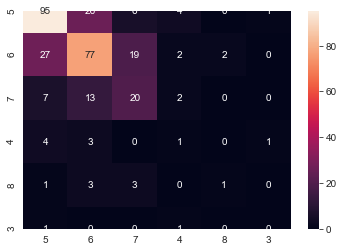

In [160]:

cm = confusion_matrix(Yv, predictions, labels=labels)
sns.heatmap(cm, annot = True, xticklabels = labels, yticklabels = labels)

# predicted 96 correctly for wine quality 5

In [161]:
# Results

cr = classification_report(Yv, predictions)
print(cr)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.11      0.11         9
           5       0.70      0.72      0.71       132
           6       0.63      0.61      0.62       127
           7       0.42      0.48      0.44        42
           8       0.33      0.12      0.18         8

    accuracy                           0.61       320
   macro avg       0.36      0.34      0.34       320
weighted avg       0.61      0.61      0.60       320

